In [1]:
pwd

'/home/wsuser/work'

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='txZ0TnUIc0bIAUNd9CJVxtpOhXB7QEtYmBXt6W5h1UIr',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'digitalnaturalist-donotdelete-pr-5tto9cotrpftjn'
object_key = 'augmented data.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


# UNZIP the Uploaded ZIP FILE

In [3]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [4]:
ls

'augmented data'/


# # LOADING DATA AND PREPROCESSING

# STEP 1 - IMPORTING THE LIBRARIES

In [5]:
# For matrix calculations and Data Management
import numpy as np

In [6]:
#Importing libraries required for the model
import tensorflow as tf
import keras
import keras.backend as K

In [7]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop
from keras.applications import *
from keras.preprocessing import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [8]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation, BatchNormalization, Dropout
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [9]:
#for plotting charts used for data visualizations
import matplotlib.pyplot as plt

In [10]:
#Libtraries for Locating and loading data
import glob
from PIL import Image 
import os
from os import listdir

In [11]:
dirName=(r"/home/wsuser/work/augmented data")
folders=listdir(dirName)

In [12]:
# Getting the names for all the folders containing the data
def getListOfFiles(dirName):
  #create a list of sub directories and files (if any)
  #names in the given directory
  listOfFile=os.listdir(dirName)
  allFiles=list()
  for fol_name in listOfFile:
    fullPath=os.path.join(dirName, fol_name)
    allFiles.append(fullPath)
  return allFiles

In [13]:
Folders=getListOfFiles(dirName)
len(Folders)
subfolders=[]
for num in range(len(Folders)):
  sub_fols=getListOfFiles(Folders[num])
  subfolders+=sub_fols
# Now the subfolders contains the address to all our data folders for each class
subfolders

['/home/wsuser/work/augmented data/Bird/SBS_AUG',
 '/home/wsuser/work/augmented data/Bird/GIB_AUG',
 '/home/wsuser/work/augmented data/Flower/LS_Orchid_AUG',
 '/home/wsuser/work/augmented data/Flower/Corpse_AUG',
 '/home/wsuser/work/augmented data/Mammal/Pangolin_AUG',
 '/home/wsuser/work/augmented data/Mammal/SW_Deer_AUG']

# STEP 2(i)- LOADING THE IMAGES INTO THE MACHINE UNDERSTANDABLE DATA

In [14]:
# Loading the data and preprocessing it to make it in trainable format
# X data includes the data generated for each image 
# Y data includes ID No, unique for every different species, so we have 6 classes which will the label
X_data=[]
Y_data=[]
id_no=0

# to make a list of tuples, where we'll store the info about the image, category and species
found=[]

# STEP 2(i)- LOADING THE IMAGES INTO THE MACHINE UNDERSTANDABLE DATA
# Loading the data and preprocessing it to make it in trainable format
# X data includes the data generated for each image 
# Y data includes ID No, unique for every different species, so we have 6 classes therefore, we will get 6 ids=[0,1,2,3,4,5], that will be the label we're classifying

#X_data=[images1,images2,images3,images4,images5,images6,images7,images8,images9,images10,images11,images12]
#Y_data=[0,1,2,3,4,5,6,7,8,9,10,11] //if both augmented data along with the non-augmented datas are considered 
#X_data=[images7,images8,images9,images10,images11,images12]
#Y_data=[0,1,2,3,4,5]
#id_no=0

# to make a list of tuples, where we'll store the info about the image, category and species
#found=[]

In [15]:
# iterating in all folders under Augmneted data folder
for paths in subfolders:
  # set folder path for each unique class and category
  files=glob.glob(paths + "/*.jpg") #(paths, "\*.jpg", recursive=True)
  # adding tuples to the list that contains folder name and subfolder name
  found.append((paths.split('/')[-2], paths.split('/')[-1])) #1st backward slash and then forward slash, so execute it again (\/) \ a special character to escape windows
  # iterating all the files under the folder one by one
  for myFile in files:
    img=Image.open(myFile)
    img=img.resize((224,224), Image.ANTIALIAS) #resizes image without ratio
    # converts the image to numpy arrays
    img=np.array(img)
    if img.shape==(224,224,3): 
      # add the numpy images to the matrix with all the data
      X_data.append(img)
      Y_data.append(id_no)
  id_no+=1

In [16]:
print(found)

[('Bird', 'SBS_AUG'), ('Bird', 'GIB_AUG'), ('Flower', 'LS_Orchid_AUG'), ('Flower', 'Corpse_AUG'), ('Mammal', 'Pangolin_AUG'), ('Mammal', 'SW_Deer_AUG')]


# STEP 2(ii) - DATA SPLITTING INTO THE TRAIN AND TEST to see our data 

In [17]:
print(X_data)
print(Y_data)

[array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), array([[[128, 139, 161],
        [128, 139, 161],
        [128, 139, 161],
        ...,
        [113, 135, 148],
        [113, 135, 148],
        [113, 135, 148]],

       [[128, 139, 161],
        

In [18]:
# Converting lists to np arrays again
X=np.array(X_data)
Y=np.array(Y_data)

In [19]:
X

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [20]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [21]:
# Print the shapes to see if they are correct
print("x-shape",X.shape,"y shape",Y.shape)

x-shape (1000, 224, 224, 3) y shape (1000,)


In [22]:
X=X.astype('float32')/255.0

In [23]:
# keras library offers a function called to_categorical() or OneHotEncoder integer data. 
# The sequence has an example of all known values so we use the to_categorical() function directly
y_cat=to_categorical(Y_data,len(subfolders))

In [24]:
print("X shape",X,"y_cat shape",y_cat)

X shape [[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]

In [25]:
print("X shape",X.shape,"y_cat shape", y_cat.shape)

X shape (1000, 224, 224, 3) y_cat shape (1000, 6)


In [26]:
# Splitting the data to Test and Train

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y_cat,test_size=0.2)

In [28]:
print("The model has" + str(len(X_train)) + "inputs")

The model has800inputs


In [29]:
print("The model has" + str(len(X_test)) + "inputs")
print("The model has" + str(len(y_train)) + "inputs")
print("The model has" + str(len(y_test)) + "inputs")

The model has200inputs
The model has800inputs
The model has200inputs


#  # STEP 3 - BUILDING A CONVOLUTION NEURAL NETWORKS

MODEL BUILDING
                    
# STEP 3(i) - Sequential

In [30]:
early_stop_loss=EarlyStopping(monitor='loss',patience=3,verbose=1)
early_stop_val_acc=EarlyStopping(monitor='val_accuracy',patience=3,verbose=1)
model_callbacks=[early_stop_loss,early_stop_val_acc]

# STEP 3(ii) ADDING LAYERS (Conv, Maxpool, Flatten, Dense, Dropout)

In [31]:
# defining our model, All the layers and configurations
                    
def load_CNN(output_size):
  K.clear_session()
  model=Sequential()
  model.add(Dropout(0.4,input_shape=(224,224,3)))
  model.add(Conv2D(256,(5,5),input_shape=(224, 224, 3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  
  #model.add(BatchNormalization())
  model.add(Conv2D(128,(3,3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  #model.add(BatchNormalization())
  model.add(Conv2D(64,(3,3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  #model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(output_size, activation='softmax'))
  return model

# STEP 4- BUILDING MODEL SUMMARY

# STEP 4(i) - Building a model based on the above defined function

In [32]:
model=load_CNN(6) # Number of Columns/ Outputs

In [33]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [34]:
model.summary() # to print the model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 256)     19456     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        7

In [35]:
weights=model.get_weights() # to get the weights from the created model

In [36]:
weights

[array([[[[-1.49520151e-02,  2.80926451e-02,  8.45055655e-03, ...,
           -1.01292804e-02, -2.23726705e-02,  3.51936370e-03],
          [-1.18798967e-02,  2.61346214e-02, -2.27040760e-02, ...,
            5.96729666e-03,  6.31519035e-03, -2.97720004e-02],
          [-2.70547662e-02,  5.07125258e-03,  3.01823467e-02, ...,
            2.52789855e-02,  1.05033182e-02, -5.59277087e-03]],
 
         [[ 1.62263140e-02,  1.31598860e-02,  1.57208554e-02, ...,
           -6.41294383e-03, -1.93956047e-02, -9.14538279e-03],
          [ 1.53164156e-02,  2.14870907e-02, -1.03604421e-03, ...,
           -1.84971727e-02, -2.91313026e-02, -8.97235237e-03],
          [-3.12632509e-03, -3.98928858e-03,  4.02561203e-03, ...,
           -1.13723110e-02,  1.28118210e-02, -2.98610590e-02]],
 
         [[ 2.73943283e-02,  2.94261426e-02, -1.26290023e-02, ...,
            4.84614074e-03, -7.88446888e-03,  1.89693272e-03],
          [ 9.83365253e-03,  1.89814679e-02,  1.49349160e-02, ...,
           -3.356

# STEP 4(ii) - FITTING THE MODEL

In [37]:
# Fitting the model on different batch sizes to see which onees turns out to be the best some arrays to store the result of each model (model trained on each bath size)
histories_acc=[]

In [38]:
histories_val_acc=[]

In [39]:
histories_loss=[]

In [40]:
histories_val_loss=[]

In [41]:
model.set_weights(weights)

In [42]:
h=model.fit(X_train,y_train,batch_size=16,epochs=7,verbose=1,callbacks=[early_stop_loss],shuffle=True,validation_data=(X_test, y_test))

Epoch 1/7
50/50 [==============================] - 464s 9s/step - loss: 1.8779 - accuracy: 0.1912 - val_loss: 1.7529 - val_accuracy: 0.2450
Epoch 2/7
50/50 [==============================] - 463s 9s/step - loss: 1.5851 - accuracy: 0.3325 - val_loss: 1.4754 - val_accuracy: 0.4450
Epoch 3/7
50/50 [==============================] - 471s 9s/step - loss: 1.2065 - accuracy: 0.5475 - val_loss: 1.4048 - val_accuracy: 0.4750
Epoch 4/7
50/50 [==============================] - 464s 9s/step - loss: 0.8715 - accuracy: 0.6950 - val_loss: 1.0891 - val_accuracy: 0.6100
Epoch 5/7
50/50 [==============================] - 458s 9s/step - loss: 0.5160 - accuracy: 0.8225 - val_loss: 0.9500 - val_accuracy: 0.7050
Epoch 6/7
50/50 [==============================] - 462s 9s/step - loss: 0.3449 - accuracy: 0.9000 - val_loss: 0.7585 - val_accuracy: 0.7350
Epoch 7/7
50/50 [==============================] - 470s 9s/step - loss: 0.2272 - accuracy: 0.9262 - val_loss: 1.1784 - val_accuracy: 0.7100


In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 256)     19456     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        7

# STEP 5 - EVALUATION: (i) ACCURACY

In [44]:
# Printing the keys we have for the stores values
print(h.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [45]:
# Appending the data for each epochh in an arr and for each batch size

In [46]:
histories_acc.append(h.history['accuracy'])

In [47]:
histories_val_acc.append(h.history['val_accuracy'])

In [48]:
histories_loss.append(h.history['loss'])

In [49]:
histories_val_loss.append(h.history['val_loss'])

In [50]:
# Converting into numpy arrays

In [51]:
histories_acc=np.array(histories_acc)

In [52]:
histories_val_acc=np.array(histories_val_acc)

In [53]:
histories_loss=np.array(histories_loss)

In [54]:
histories_val_loss=np.array(histories_val_loss)

In [55]:
# Here we have 3 columns and 6 rows each, ever row represents different batch sizes and every coloumn represents different epoch scores
print('histories_acc',histories_acc,
      'histories_loss',histories_loss,
      'histories_val_acc',histories_val_acc,
      'histories_val_loss',histories_val_loss)

histories_acc [[0.19125    0.33250001 0.54750001 0.69499999 0.82249999 0.89999998
  0.92624998]] histories_loss [[1.8779074  1.58509302 1.2065233  0.8714608  0.51601481 0.34488788
  0.22724998]] histories_val_acc [[0.245      0.44499999 0.47499999 0.61000001 0.70499998 0.73500001
  0.70999998]] histories_val_loss [[1.75293887 1.4753983  1.40482116 1.08910859 0.94995427 0.75854737
  1.17840242]]


180


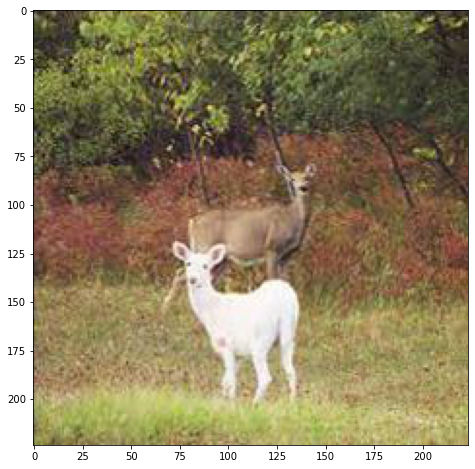

In [56]:
# Loading the test data
image_number =np.random.randint(0,len(X_test))
print(image_number)

# Plotting the test image
plt.figure(figsize=(8,8))
plt.imshow(X_test[image_number])

# # PREDICTION

# STEP 5(ii) - LOADING A TEST IMAGE AND MAKING A TEST PREDICTION

In [57]:
# Predicting the image's classes
# Individual scores for each calss as well as class with the highest score is printed 
# Making predictions, storing teh result as an array of probabilities of each class predicted
                    
predictions=model.predict([X_test[image_number].reshape(1,224,224,3)])

In [58]:
for idx, result, x in zip(range(0,6),found, predictions[0]):
  print("Label: {}, Type : {}, Species : {}, Score : {}%".format(idx,result[0],result[1], round(x*100,3)))

Label: 0, Type : Bird, Species : SBS_AUG, Score : 1.526%
Label: 1, Type : Bird, Species : GIB_AUG, Score : 3.19%
Label: 2, Type : Flower, Species : LS_Orchid_AUG, Score : 0.452%
Label: 3, Type : Flower, Species : Corpse_AUG, Score : 0.128%
Label: 4, Type : Mammal, Species : Pangolin_AUG, Score : 4.734%
Label: 5, Type : Mammal, Species : SW_Deer_AUG, Score : 89.97%


In [59]:
#predictiong the class with max probabilty
#ClassIndex=model.predict([X_test[image_number].reshape(1,224,224,3)])
ClassIndex=np.argmax(model.predict([X_test[image_number].reshape(1,224,224,3)]), axis=-1)
#getting the index of th eclass which we can pass to the boat_types list to get the boat type name
ClassIndex
#printing the final output
print(found[ClassIndex[0]])

('Mammal', 'SW_Deer_AUG')


# STEP 6 - SAVE THE MODEL

In [60]:
model_json=model.to_json() #indent=2

In [61]:
with open("final_model.json","w") as json_file:
  json_file.write(model_json)

In [62]:
# serializing the weights to H5
    
model.save_weights("final_model.h5")
print("Saved model to disk")

Saved model to disk


In [63]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import numpy
import os

In [64]:
# load json and create model
json_file = open('final_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [65]:
# load weights into new model
loaded_model.load_weights("final_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [66]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#loaded_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

7/7 [==============================] - 31s 4s/step - loss: 0.7705 - accuracy: 0.7100
accuracy: 71.00%


# IBM Deployment

In [67]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 10.1 MB/s eta 0:00:01


In [68]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"ii9EXqWoJABOiTflhUbuzR_FoJN4Pewj81X3GqOlpWd7" # replace this key by the one u created for ur project manage/Access(IBM)/API keys/Create/give a name of ur wish/ download and then clck on the copy to place the key you created here
}
client=APIClient(wml_credentials)

In [69]:
client

In [70]:
def guid_space_name(client,species_deploy): 
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==species_deploy)['metadata']['id'])

In [71]:
space_uid=guid_space_name(client,'cnn_species') # cnn_species is the deployment space we have created
print("Space UID"+space_uid)

Space UID35c5da1a-8e55-436d-838f-5975358bd0be


In [72]:
client.set.default_space(space_uid)

'SUCCESS'

In [73]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [76]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9') # specify any specification thats generated in previous step

In [77]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [78]:
ls

'augmented data'/   final_model.h5   final_model.json


In [82]:
!tar -zcvf species-classification-model.tgz final_model.h5

final_model.h5


In [84]:
model_details=client.repository.store_model(model='species-classification-model.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Model Building",
    client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_space_uid    
})

In [85]:
model_id=client.repository.get_model_id(model_details)

In [86]:
model_id 

'b83f4780-6369-4dc5-a78e-be91c1e5ebda'

In [87]:
client.repository.download(model_id,'species.tar.gb')

Successfully saved model content to file: 'species.tar.gb'


'/home/wsuser/work/species.tar.gb'

In [88]:
ls

'augmented data'/   final_model.json                   species.tar.gb
 final_model.h5     species-classification-model.tgz
